# Exemplos - pg. 348 Chapra

Em um experimento no Laboratório de Medidas Elétricas, obtivemos os seguintes dados:

$$
\mathbf{X} = \begin{bmatrix}
10 & 20 & 30 & 40 & 50 & 60 & 70 & 80
\end{bmatrix}
$$

$$
\mathbf{Y} = \begin{bmatrix}
25 & 70 & 380 & 550 & 610 & 1220 & 830 & 1450
\end{bmatrix}
$$

Encontre a equação que melhor represente este comportamento.

## Resolução manual

Para achar a melhor equação, vamos utilizar o método dos mínimos quadrados. Para isso, vamos utilizar a equação:

$$
a1 = \frac{n \sum (x_i y_i) - \sum x_i \sum y_i}{n \sum x_i^2 - (\sum x_i)^2}
$$

e 

$$
a0 = \frac{\sum y_i - a1 \sum x_i}{n}
$$

onde $a0$ é o coeficiente linear e $a1$ é o coeficiente angular.

Para isso, vamos utilizar o Python para calcular as somas e depois substituir na equação.



In [ ]:
import numpy as np

X = np.array([10, 20, 30, 40, 50, 60, 70, 80])
Y = np.array([25, 70, 380, 550, 610, 1220, 830, 1450])

n = len(X)

sum_x = np.sum(X)
sum_y = np.sum(Y)
sum_xy = np.sum(X * Y)
sum_x2 = np.sum(X ** 2)

a1 = (n * sum_xy - sum_x * sum_y) / (n * sum_x2 - sum_x ** 2)

a0 = (sum_y - a1 * sum_x) / n

print(f"a0 = {a0}")
print(f"a1 = {a1}")
print(f"y = {a0} + {a1} * x")



a0 = -234.28571428571422
a1 = 19.470238095238095
y = -234.28571428571422 + 19.470238095238095 * x


## Resolução no computador

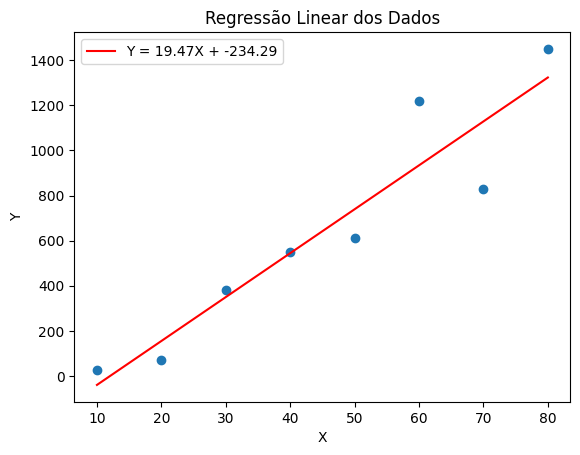

Y = 19.47X + -234.29


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Dados
X = np.array([10, 20, 30, 40, 50, 60, 70, 80])
Y = np.array([25, 70, 380, 550, 610, 1220, 830, 1450])

# Realiza uma regressão linear
slope, intercept, r_value, p_value, std_err = linregress(X, Y)

# Cria a equação da linha de melhor ajuste
line = slope * X + intercept

# Plota os dados e a linha de melhor ajuste
plt.scatter(X, Y)
plt.plot(X, line, 'r', label=f'Y = {slope:.2f}X + {intercept:.2f}')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Regressão Linear dos Dados')
plt.show()

print(f'Y = {slope:.2f}X + {intercept:.2f}')



# Exemplos – pg. 363 Chapra

Fit a second-order polynomial to the data in the first two columns
of Table 17.4

| $x_i$ | $y_i$ | $(y_i - \bar{y})^2$ | $(y_i - a0 - a1 x_i - a2 x_i^2)^2$ |
|-------|-------|----------------------|---------------------------------------|
| 0     | 2.1   | 544.44              | 0.14332                               |
| 1     | 7.7   | 314.47              | 1.00286                               |
| 2     | 13.6  | 140.03              | 1.08158                               |
| 3     | 27.2  | 3.12                | 0.80491                               |
| 4     | 40.9  | 239.22              | 0.61951                               |
| 5     | 61.1  | 1272.11             | 0.09439                               |
| $\Sigma$ | 152.6 | 2513.39          | 3.74657                               |



## Resolução manual

Para achar a melhor equação, vamos utilizar o método da regressão polinomial. Para isso, vamos criar a matriz de coeficientes:


$$\begin{bmatrix}
\sum x_1⁰ & \sum x_i & \sum x_i^2 \\
\sum x_i & \sum x_i^2 & \sum x_i^3 \\
\sum x_i^2 & \sum x_i^3 & \sum x_i^4 \\
\end{bmatrix}
\begin{bmatrix}
a0 \\
a1 \\
a2 \\
\end{bmatrix}
=
\begin{bmatrix}
\sum y_i \\
\sum x_i y_i \\
\sum x_i^2 y_i \\
\end{bmatrix}$$

In [8]:
import numpy as np

# Data points
x = np.array([0, 1, 2, 3, 4, 5])
y = np.array([2.1, 7.7, 13.6, 27.2, 40.9, 61.1])

# X matrix 
x_0_sum = np.sum(x ** 0)
x_1_sum = np.sum(x ** 1)
x_2_sum = np.sum(x ** 2)
x_3_sum = np.sum(x ** 3)
x_4_sum = np.sum(x ** 4)

# Y matrix
y_0_sum = np.sum(y * x ** 0)
y_1_sum = np.sum(y * x ** 1)
y_2_sum = np.sum(y * x ** 2)

A = np.array([[x_4_sum, x_3_sum, x_2_sum],
			  [x_3_sum, x_2_sum, x_1_sum],
			  [x_2_sum, x_1_sum, x_0_sum]])

B = np.array([y_2_sum, y_1_sum, y_0_sum])

print(f"A = {A}")
print(f"B = {B}")

a2, a1, a0 = np.linalg.solve(A, B)

print(f"a2 = {a2}")
print(f"a1 = {a1}")
print(f"a0 = {a0}")

print(f"Y = {a2:.2f}X^2 + {a1:.2f}X + {a0:.2f}")



A = [[979 225  55]
 [225  55  15]
 [ 55  15   6]]
B = [2488.8  585.6  152.6]
a2 = 1.8607142857142862
a1 = 2.3592857142857135
a0 = 2.4785714285714224
Y = 1.86X^2 + 2.36X + 2.48


## Resolução no computador

The fitted second-order polynomial is: y = 2.4786 + 2.3593x + 1.8607x^2


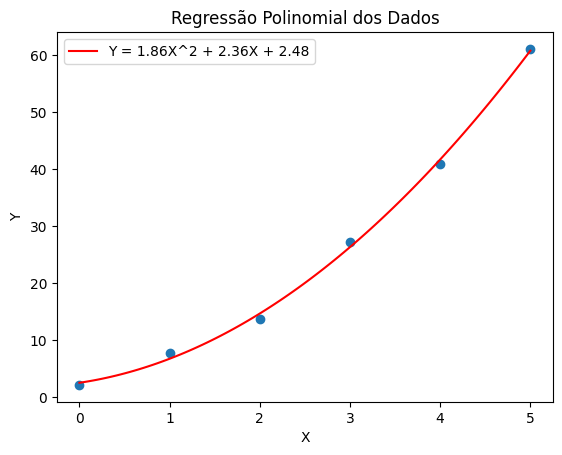

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Data points
x = np.array([0, 1, 2, 3, 4, 5])
y = np.array([2.1, 7.7, 13.6, 27.2, 40.9, 61.1])

# Fit a second-order polynomial to the data
coefficients = np.polyfit(x, y, 2)

# The coefficients are in the order of a2, a1, a0 for a second-order polynomial
a2, a1, a0 = coefficients

print(f"The fitted second-order polynomial is: y = {a0:.4f} + {a1:.4f}x + {a2:.4f}x^2")

# Plot the fitted polynomial


x_values = np.linspace(0, 5, 100)

y_values = a2 * x_values ** 2 + a1 * x_values + a0

plt.plot(x_values, y_values, 'r', label=f'Y = {a2:.2f}X^2 + {a1:.2f}X + {a0:.2f}')
plt.scatter(x, y)
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Regressão Polinomial dos Dados')
plt.show()